In [91]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [93]:
# Importing Housing.csv
housing = pd.read_csv(r'C:\Users\rajso\Downloads\train.csv')

In [94]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
housing.shape

(1460, 81)

In [96]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [97]:
housing.describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,141.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,1572.41,5644.0


In [98]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)[ round(housing.isnull().sum()/len(housing.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


### EDA

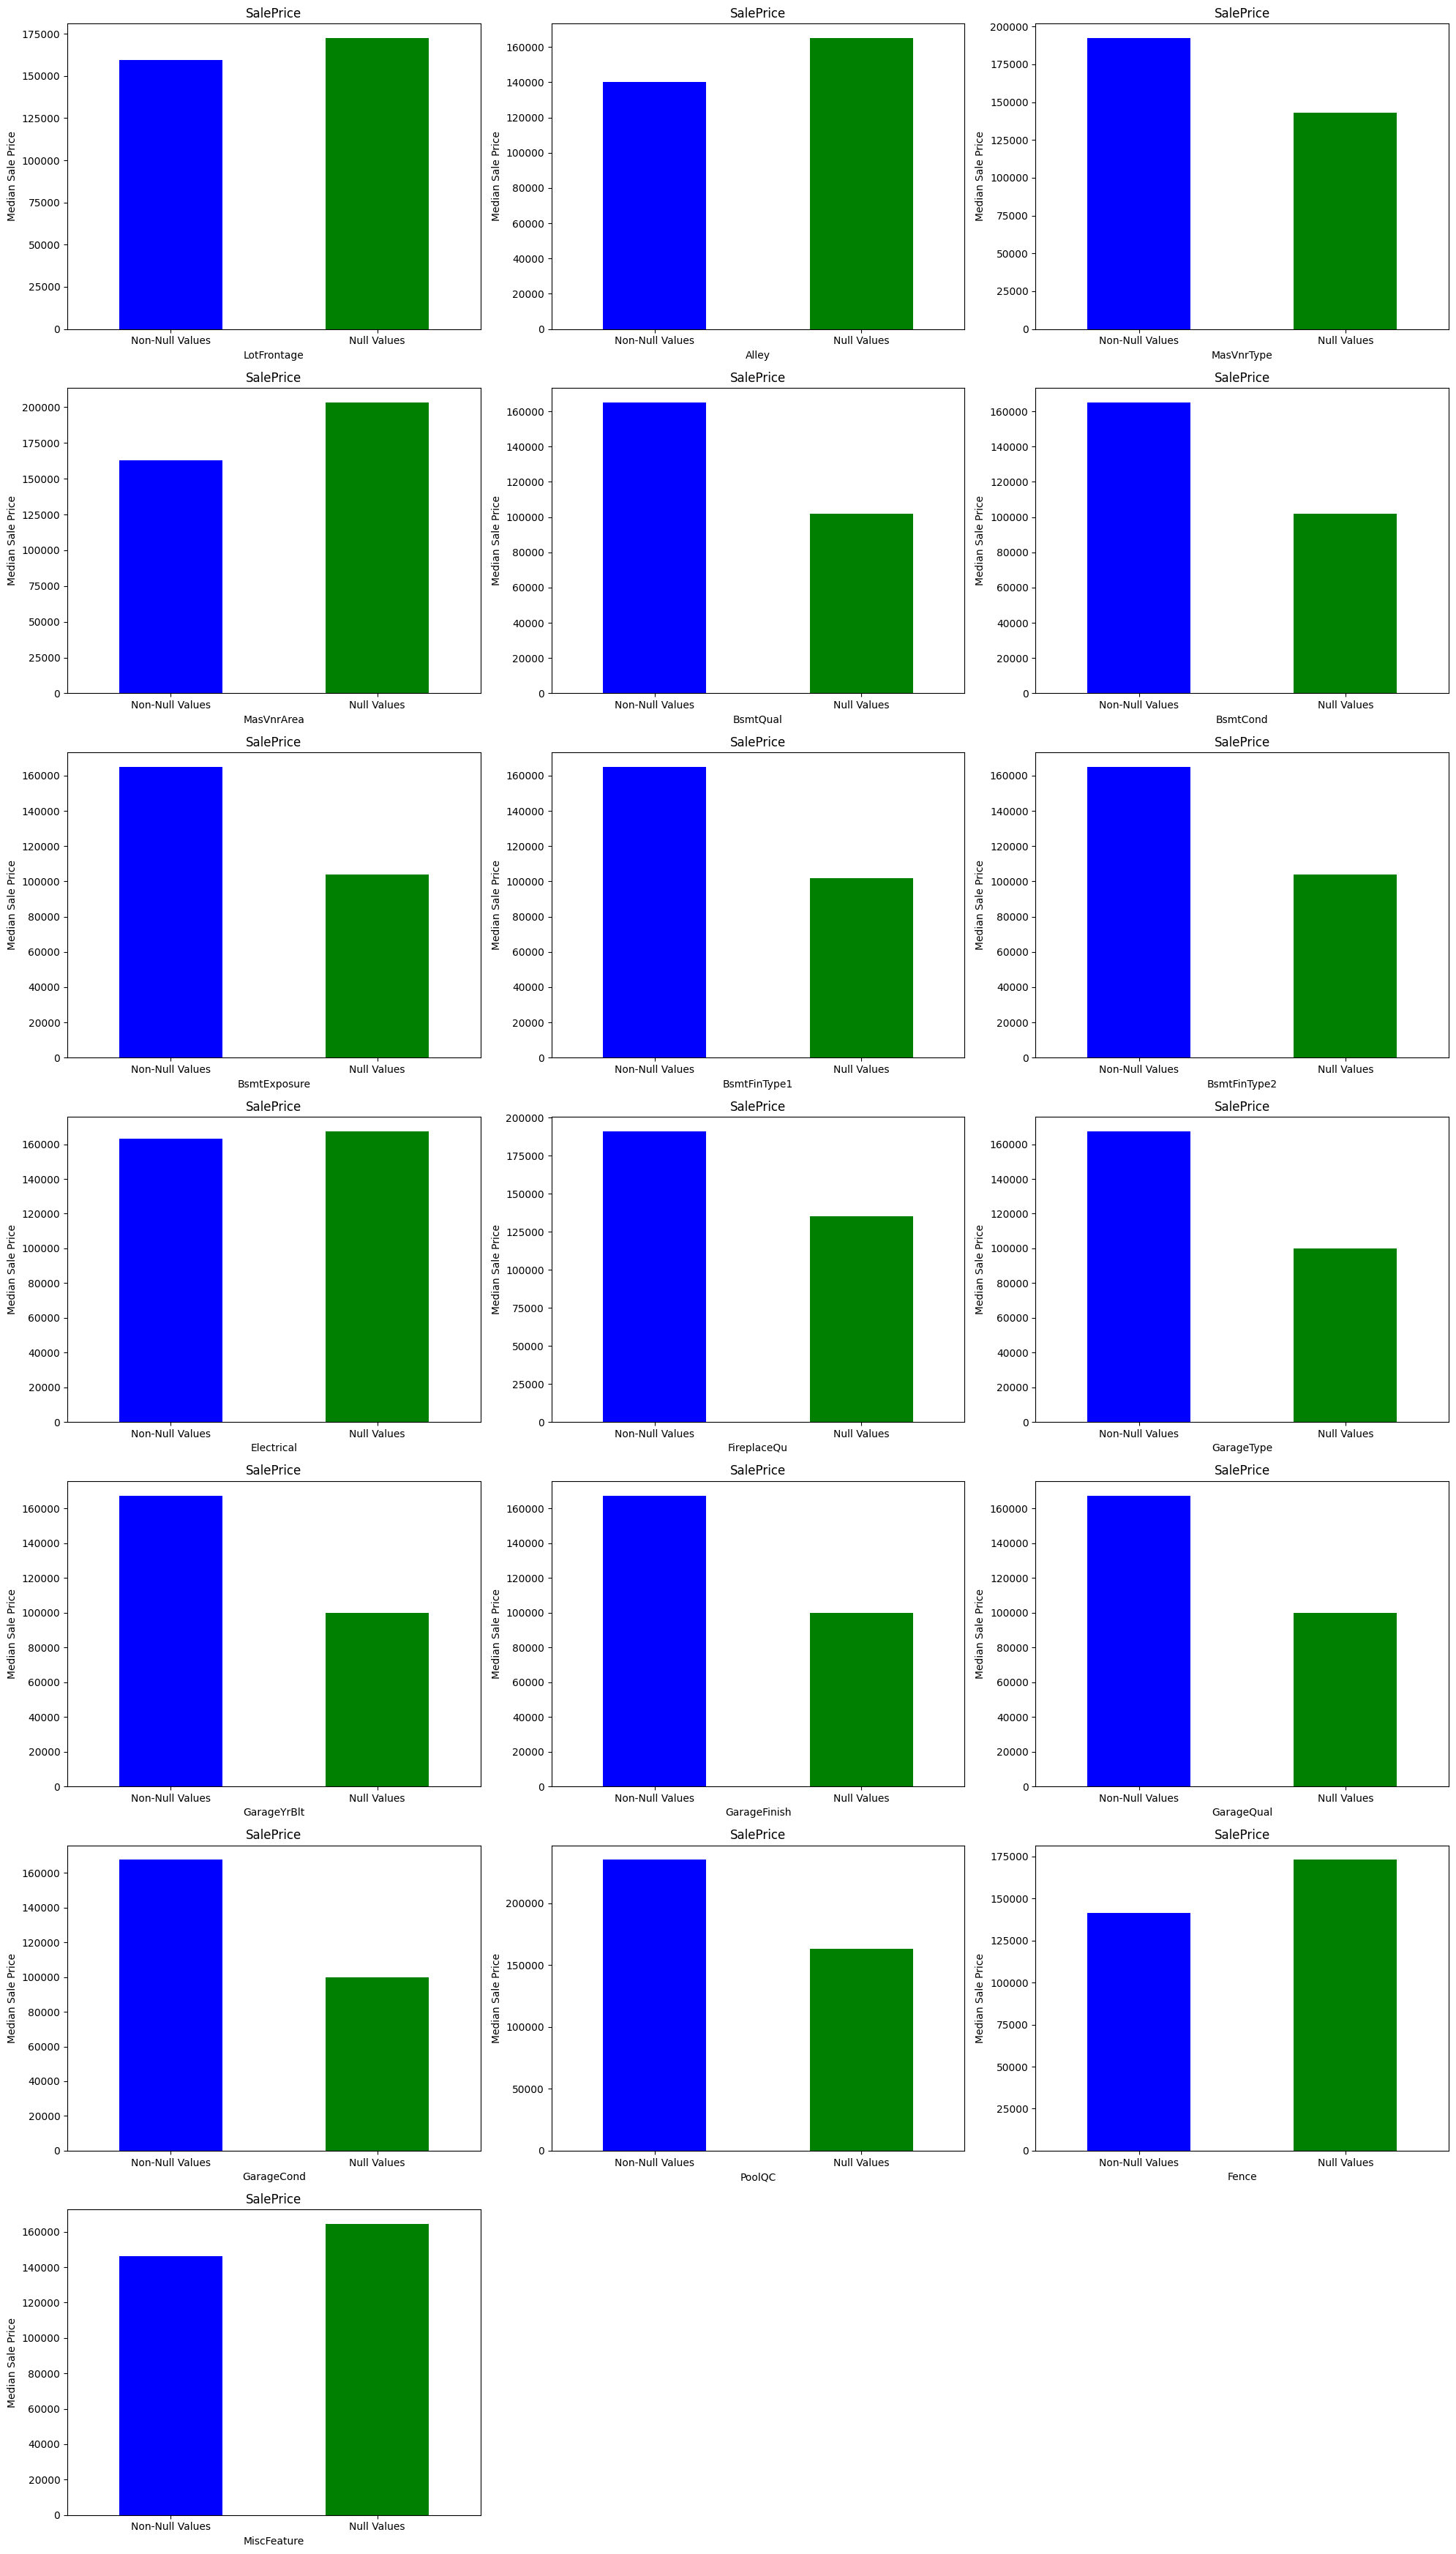

In [99]:
# Assuming 'housing' is your pandas DataFrame that contains the data and 'plt' is from matplotlib.pyplot

# Checking if NaN Values have any impact on the Sale Price or not
nan_col = housing.columns[housing.isnull().any()].tolist()
housing_copy = housing.copy()

# Determine the number of rows and columns needed for the subplots
n_rows = -(-len(nan_col) // 3)  # Ceiling division to determine rows needed
fig, axs = plt.subplots(n_rows, 3, figsize=(20, n_rows * 5), squeeze=False)

for col_name, ax in zip(nan_col, axs.flatten()):
    temp_series = housing_copy[col_name].isnull().astype(str).replace({'True': 'Null Values', 'False': 'Non-Null Values'})
    median_sale_price = (housing_copy.assign(temp_col=temp_series)
                                 .groupby('temp_col')['SalePrice']
                                 .median())
    median_sale_price.plot.bar(color=['b','g'], rot=0, ax=ax)
    ax.set_title('SalePrice')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Median Sale Price')

# Turn off any unused subplots
for ax in axs.flatten()[len(nan_col):]:
    ax.set_axis_off()

plt.tight_layout()
plt.show()


In [100]:
# Checking the number of numerical features and the number of categorical features
num_col = []
cat_col = []
for i in housing.columns:
    if housing[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 38 numerical features in the dataset
There are 43 categorical features in the dataset


Text(0.5, 1.0, 'House Price vs YearSold')

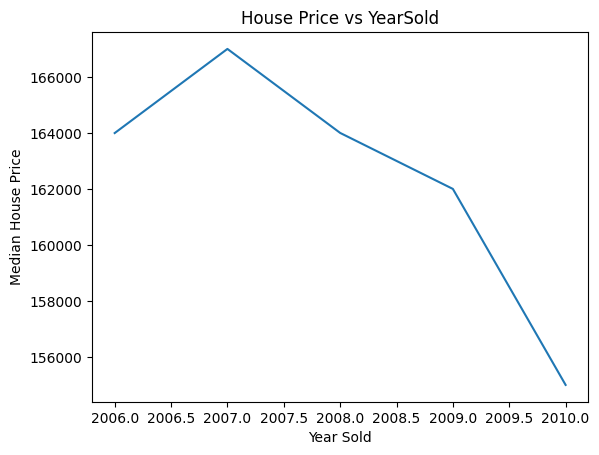

In [101]:
# Chekcing if the median price changes with the year sold
housing['YrSold'] = housing['YrSold'].astype('int')
housing.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

#### Signifcant from in Avg House price after 2008

In [102]:
# Extracting the Year Features from the Dataset and then checking how the price varies with respect to the age of the estate
yr_cols = []
for i in housing.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        yr_cols.append(i)
print('List of features with Year are:')
print(yr_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


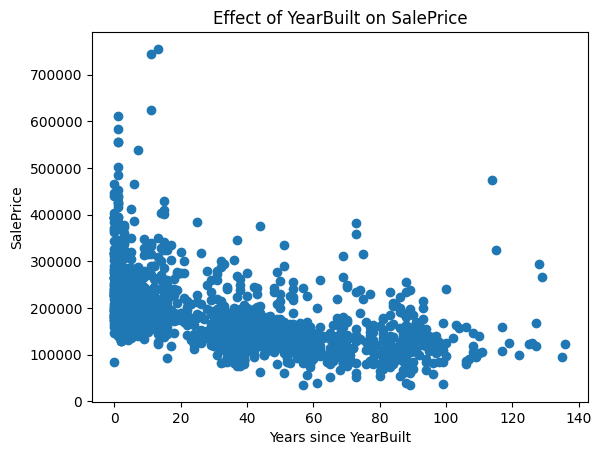

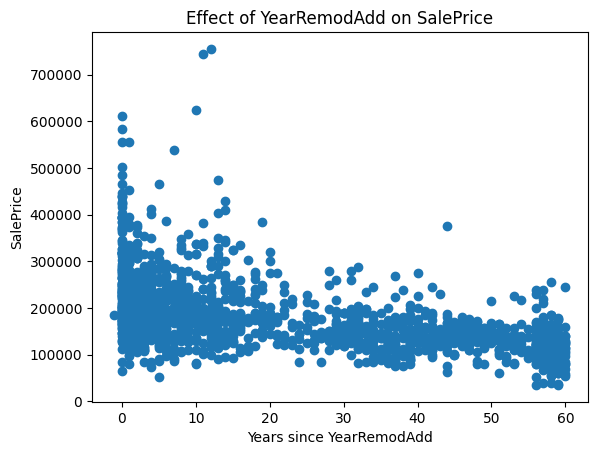

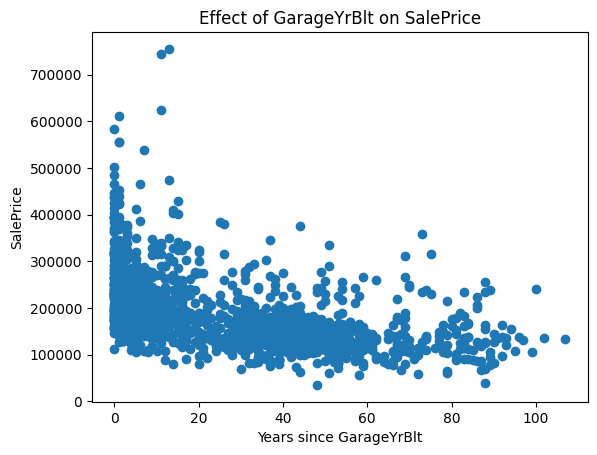

In [103]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price

# Create a copy of the DataFrame to avoid modifying the original data
housing_copy = housing.copy()

# List of year-related columns, excluding 'YrSold'
yr_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']  # Replace with actual column names

for feature in yr_cols:
    # Calculate the age or years since the event (e.g., renovation)
    housing_copy[feature] = housing_copy['YrSold'] - housing_copy[feature]

    # Scatter plot of the feature against SalePrice
    plt.scatter(housing_copy[feature], housing_copy['SalePrice'])
    plt.title(f'Effect of {feature} on SalePrice')
    plt.xlabel(f'Years since {feature}')
    plt.ylabel('SalePrice')
    plt.show()


In [104]:
# Dropping ID Columns 
housing.drop('Id', axis=1, inplace=True)

### Bivariate Analysis

In [ ]:


# Assuming 'housing' is your pandas DataFrame

# Select numerical predictor variables
housing_num = housing.select_dtypes(include=['int64', 'float64'])

# Determine the number of rows needed for the subplots
num_cols = len(housing_num.columns)
n_rows, n_cols = -(-num_cols // 3), 3  # Ceiling division for rows, 3 columns

# Initialize the matplotlib figure and axes
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 7))  # Adjusted figsize

# Flatten the axes array for easy iteration if it's multidimensional
flat_axes = axs.flatten() if n_rows > 1 else [axs]

# Iterate over the numerical columns to create scatter plots
for col, ax in zip(housing_num.columns, flat_axes):
    sns.scatterplot(x=col, y='SalePrice', hue='SalePrice', data=housing_num, ax=ax, palette='icefire')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('SalePrice', fontsize=12)
    ax.set_title(f'SalePrice vs {col}')

# Turn off any unused subplots
for ax in flat_axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



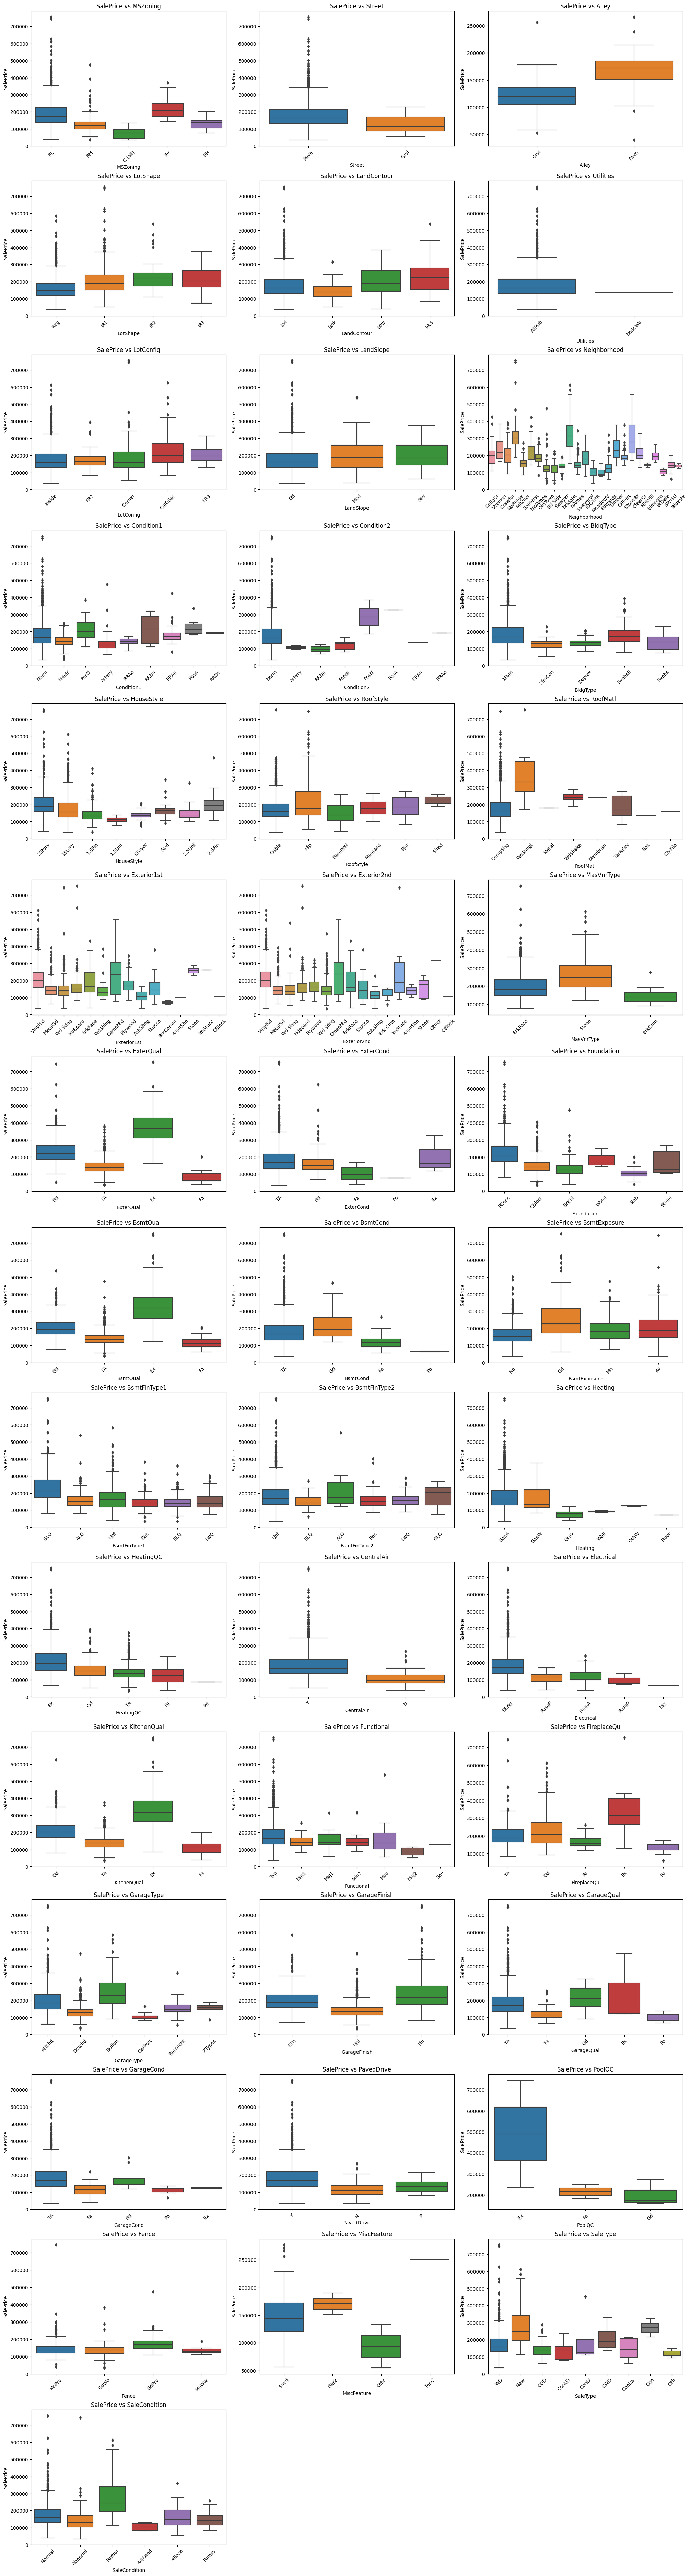

In [106]:


# Assuming 'housing' is your pandas DataFrame

# Select categorical variables
categorical_cols = housing.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    # Create a subplot for each categorical column
    n_cols = 3
    n_rows = -(-len(categorical_cols) // n_cols)  # Ceiling division
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    for idx, col in enumerate(categorical_cols):
        # Using sns.boxplot directly
        sns.boxplot(x=col, y='SalePrice', data=housing, ax=axs[idx])
        axs[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
        axs[idx].set_title(f'SalePrice vs {col}')

    # Turn off any unused axes
    for ax in axs[len(categorical_cols):]:
        ax.set_visible(False)

    plt.show()
else:
    print("No categorical columns to plot.")




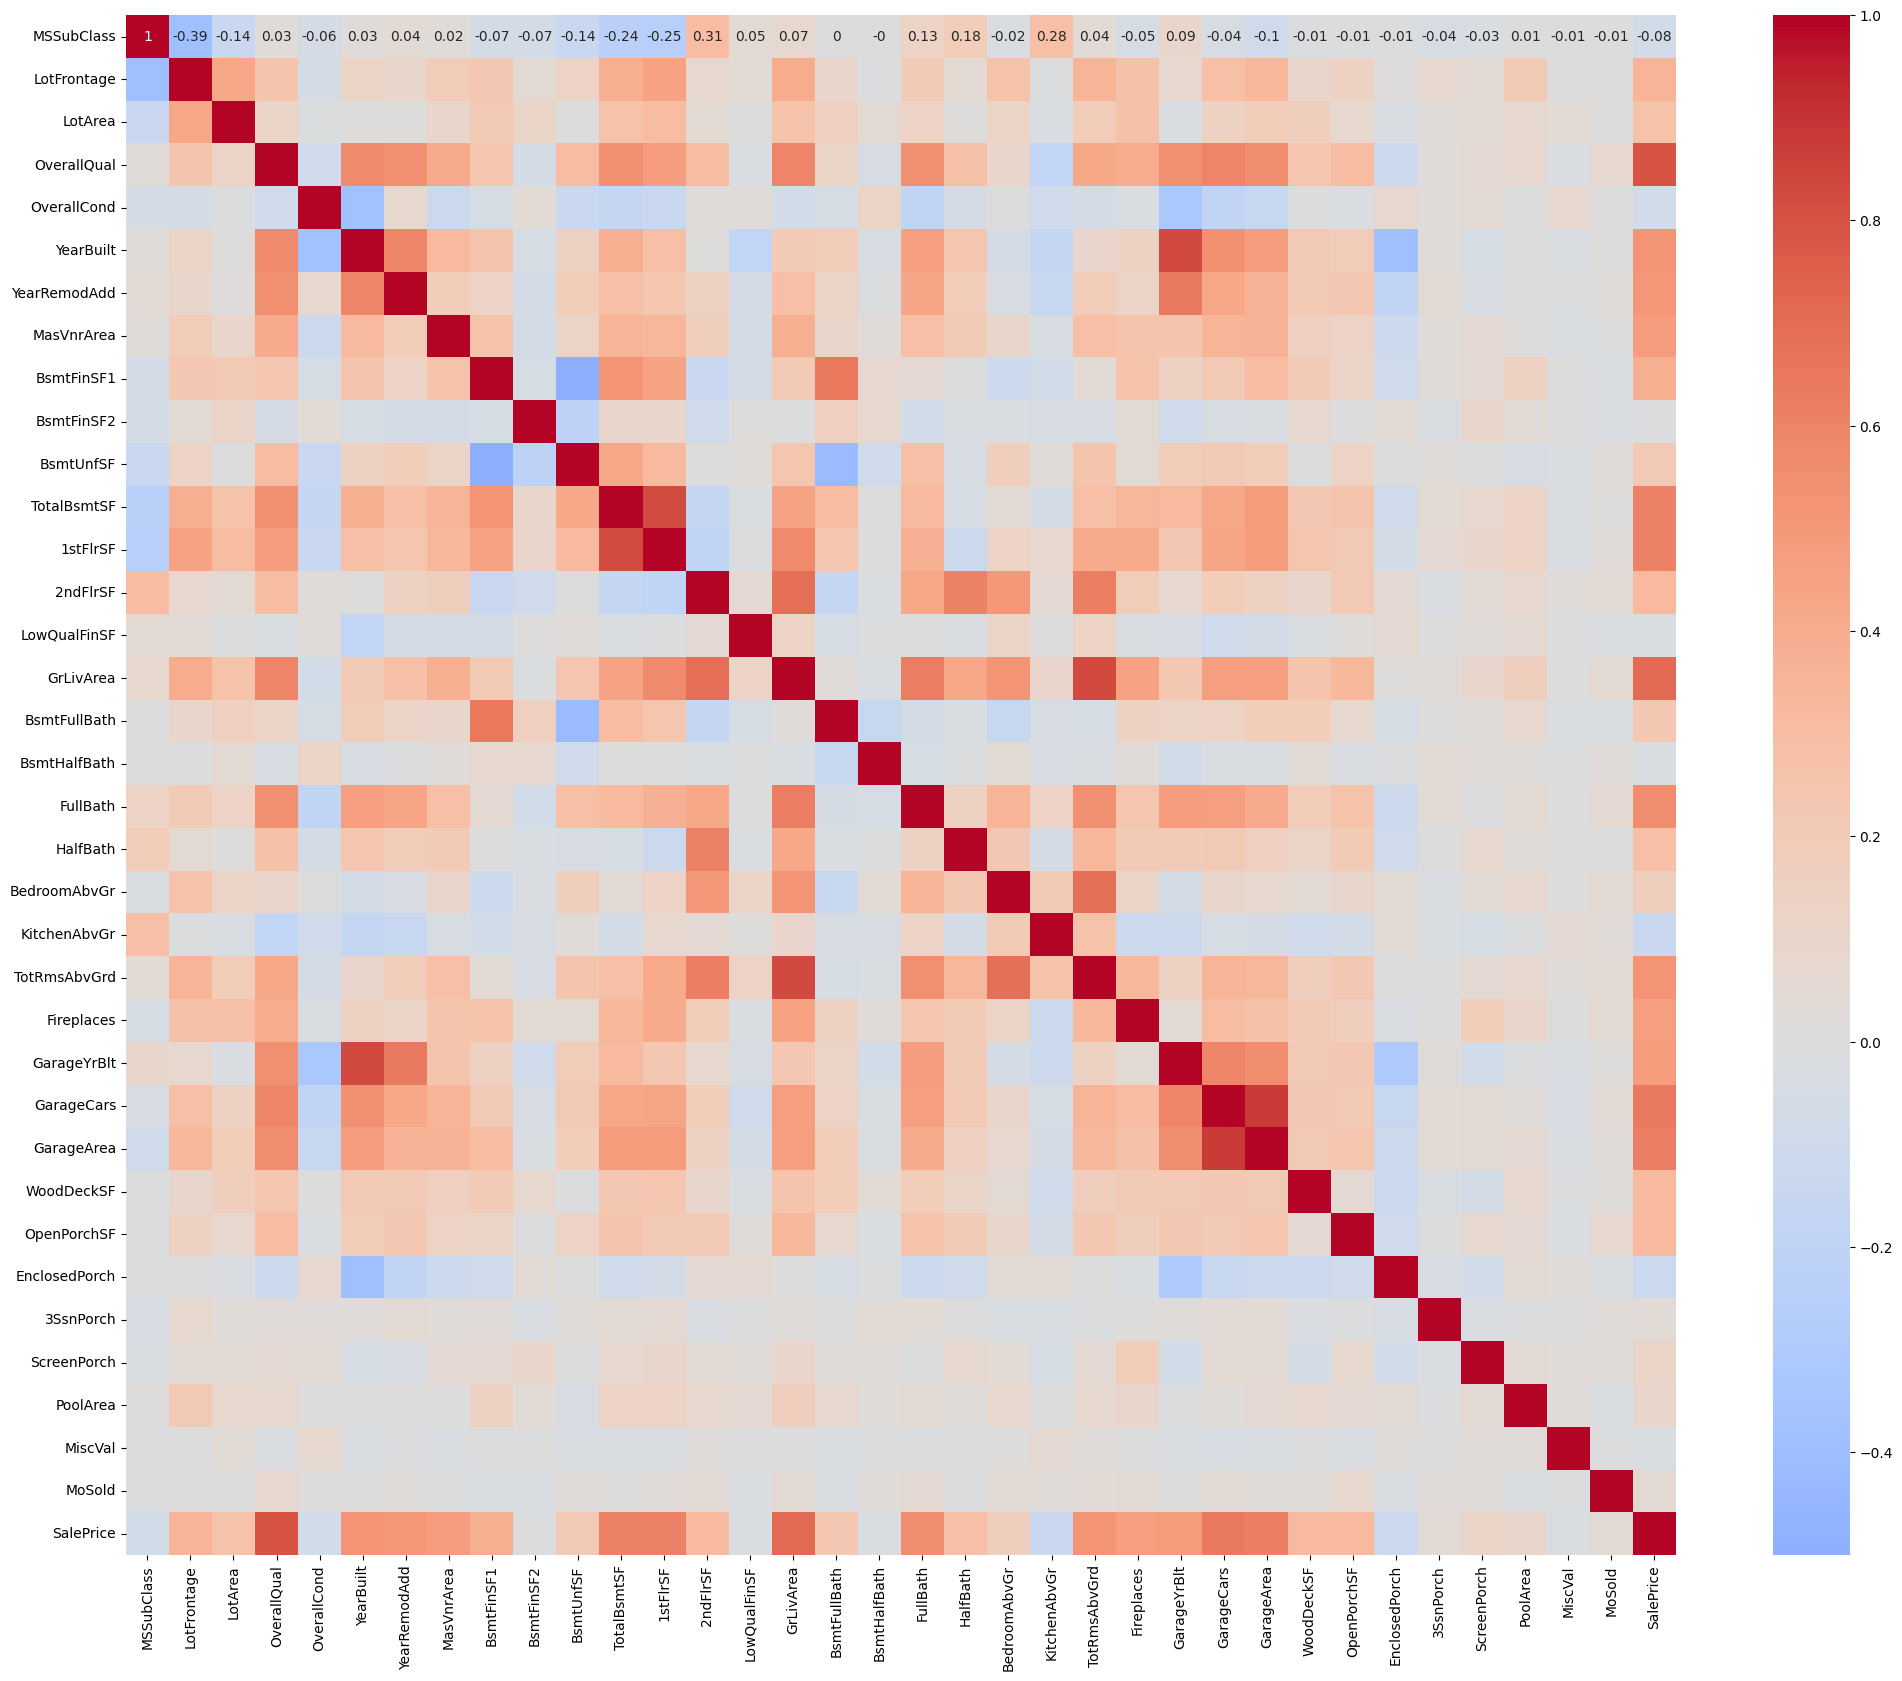

In [107]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(housing_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

### Data Preparation

In [108]:
# New features derivation
housing['age']=housing['YrSold']-housing['YearBuilt']
housing['garage_age'] = housing['YrSold'] - housing['GarageYrBlt']
housing['remodel_age'] = housing['YrSold'] - housing['YearRemodAdd']

housing.drop('GarageYrBlt',axis=1,inplace=True)

In [109]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [110]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
housing[['MSSubClass']] = housing[['MSSubClass']].astype(str) 
housing['YrSold'] = housing['YrSold'].astype(str)
housing['MoSold'] = housing['MoSold'].astype(str)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,garage_age,remodel_age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,5,5.0,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,31,31.0,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,7,7.0,6
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,91,8.0,36
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,8,8.0,8


### Handling Missing Values 

In [111]:
# getting list of columns with Null Values again
print(round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)[ round(housing.isnull().sum()/len(housing.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageFinish     5.55
GarageCond       5.55
GarageType       5.55
garage_age       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


In [112]:
#From the Data Description
#NA = No Pool for PoolQC
housing['PoolQC'] = housing['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')
#NA = No Alley
housing['Alley'] = housing['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
#NA = No Fence
housing['Fence'] = housing['Fence'].fillna('None')
#NA = No Fireplace
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
#NA = No Garage
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['garage_age'] = housing['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

In [113]:
# getting list of columns with Null Values again
print(round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)[ round(housing.isnull().sum()/len(housing.index),2) > 0 ] )

LotFrontage    17.74
dtype: float64


In [114]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
housing['LotFrontage'] = housing.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [115]:
round(housing.isnull().sum()/len(housing.index)*100,5).sort_values(ascending=False)[ round(housing.isnull().sum()/len(housing.index),5) > 0 ]

Electrical    0.06849
dtype: float64

In [116]:
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

In [117]:
round(housing.isnull().sum()/len(housing.index)*100,5).sort_values(ascending=False)

MSSubClass      0.0
GarageQual      0.0
GarageCars      0.0
GarageFinish    0.0
GarageType      0.0
               ... 
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
remodel_age     0.0
Length: 82, dtype: float64

In [118]:
#Skewed or uniformative that contain dominany values
# Trying to remove redundant features
def redundant_feature(housing):
    redundant = []
    for i in housing.columns:
        counts = housing[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(housing) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [119]:
redundant_features = redundant_feature(housing)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [120]:
housing.drop(redundant_features,axis=1,inplace=True)

In [121]:
housing.shape

(1460, 78)

### Outliers removal

In [122]:
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
housing = drop_outliers(housing)
housing.shape

(1455, 78)

### Features derivation

In [123]:
#Creating some new features based on the existing features
#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
housing['YrBltAndRemod']=housing['YearBuilt']+housing['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
housing['Total_sqr_footage'] = (housing['BsmtFinSF1'] + housing['BsmtFinSF2'] + housing['1stFlrSF'] + housing['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
housing['Total_Bathrooms'] = (housing['FullBath'] + (0.5 * housing['HalfBath']) + housing['BsmtFullBath'] + (0.5 * housing['BsmtHalfBath']))
#Creating derived column for total porch area 
housing['Total_porch_sf'] = (housing['OpenPorchSF'] + housing['3SsnPorch'] + housing['EnclosedPorch'] + housing['ScreenPorch'] + housing['WoodDeckSF'])

### Dummy Variable creation

In [124]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in housing.columns:
    if housing[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
housing_dummy= pd.get_dummies(housing[cat_col])   
housing=pd.concat([housing,housing_dummy],axis=1)
housing= housing.drop(cat_col,axis=1)    

In [125]:
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,garage_age_Ex,garage_age_Fa,garage_age_Gd,garage_age_None,garage_age_Po,garage_age_TA
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,False,False,True,False,False,False,False,False,False,True
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,False,False,True,False,False,False,False,False,False,True
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,False,False,True,False,False,False,False,False,False,True
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,False,False,False,False,False,False,False,False,False,True
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,False,False,True,False,False,False,False,False,False,True


### Split

In [126]:
X = housing.drop('SalePrice',axis=1)
y = housing['SalePrice']

In [127]:
#Check for Correlation
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  # Using Python's built-in bool
 #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931280
                                                 ...   
SaleType_New          SaleCondition_Partial    0.986718
SaleType_WD           SaleCondition_Normal     0.632805
                      SaleCondition_Partial   -0.768294
SaleCondition_Normal  SaleCondition_Partial   -0.652835
garage_age_None       garage_age_TA           -0.718832
Length: 165, dtype: float64


In [128]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [129]:
# Chekcing the shape after dropping all co-related columns
X.shape

(1455, 234)

In [130]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

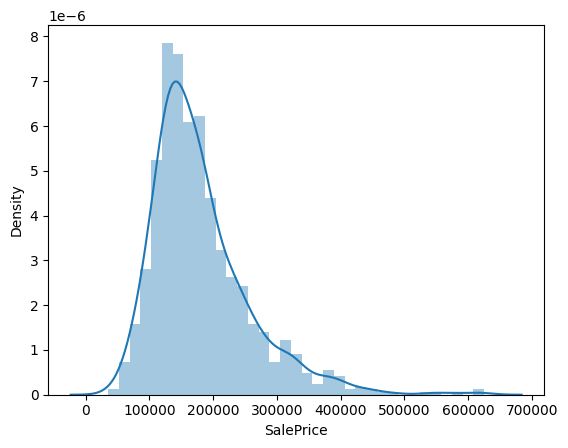

In [131]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

# Right Skewed

In [132]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

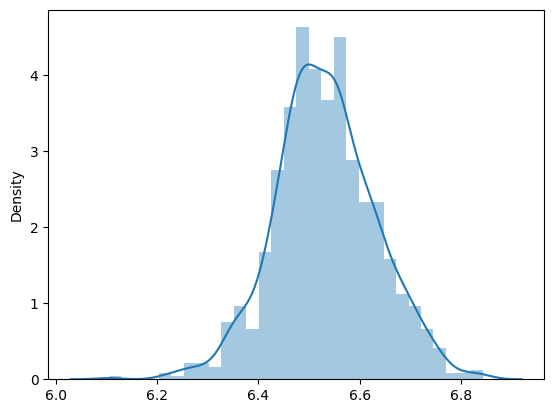

In [133]:
sns.distplot(y_train)
plt.show()

In [134]:
# Applying Scaler function to fit columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [135]:
X_train.head()

,LotFrontage,LotArea,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,TotRmsAbvGrd,GarageArea,OpenPorchSF,EnclosedPorch,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,garage_age_Ex,garage_age_Fa,garage_age_Gd,garage_age_Po,garage_age_TA
0,0.068493,0.052116,0.428571,0.0,0.5,0.0,0.333333,0.418705,0.000000,0.307971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.136986,0.128504,0.428571,0.0,0.5,0.0,0.555556,0.618705,0.083665,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.150685,0.118124,0.428571,0.0,0.0,0.0,0.555556,0.312230,0.095618,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.301370,0.106880,0.428571,0.0,0.0,0.0,0.222222,0.323741,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.236301,0.143217,0.428571,0.0,0.5,0.0,0.444444,0.505036,0.089641,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


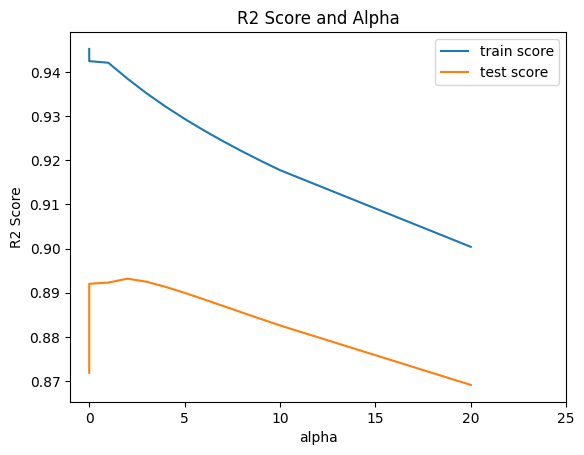

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8628256037158747
The MSE of the model on the test dataset for optimum alpha is 0.0014681516360969627
The RMSE of the model on the test dataset for optimum alpha is 0.038316466905195766


In [136]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('The RMSE of the model on the test dataset for optimum alpha is', rmse_test)

In [ ]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

In [ ]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

In [ ]:
## Second Run
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('The RMSE of the model on the test dataset for optimum alpha is', rmse_test)

In [ ]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

#Top 20 features impacting the price

### Lasso

In [ ]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('The RMSE of the model on the test dataset for optimum alpha is', rmse_test)


In [ ]:

params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

## Summary


To compare the performance of the Lasso and Ridge regression models based on the provided information, we can summarize the key metrics - optimum alpha, R2 Score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE):

Lasso Regression:
Optimum Alpha: 0.0001
R2 Score: 0.8259 (indicates about 82.59% of the variance in the target variable is explained by the model)
MSE: 0.001863 (a measure of the average of the squares of the errors)
Ridge Regression:
Optimum Alpha: 2
R2 Score: 0.8281 (indicates about 82.81% of the variance in the target variable is explained by the model)
MSE: 0.001840 (a measure of the average of the squares of the errors)
RMSE: 0.04289 (the square root of the MSE, providing an error metric in the same units as the target variable)
Summary and Comparison:
R2 Score Comparison: The R2 Score for the Ridge model (0.8281) is slightly higher than that for the Lasso model (0.8259). This suggests that the Ridge model explains a marginally higher proportion of the variance in the target variable compared to the Lasso model.

MSE and RMSE Comparison: The MSE for the Ridge model (0.001840) is slightly lower than that for the Lasso model (0.001863). A lower MSE indicates better model performance with smaller error variance. Similarly, the RMSE of the Ridge model is 0.04289, which is also a measure of how well the model predicts the target variable, with lower values indicating better performance.

Optimum Alpha Values: The optimal alpha value for Lasso is significantly lower (0.0001) compared to Ridge (2). This could indicate a difference in how each model handles regularization and the importance of feature weights. Lasso tends to produce some coefficients that are exactly zero, which can be interpreted as a form of automatic feature selection.

Conclusion:
Both models perform comparably well, with Ridge having a slight edge in terms of R2 Score and MSE/RMSE. The choice between using Lasso or Ridge should also consider the specific context of the problem, the nature of the data, and whether feature selection (as performed by Lasso) is a desired outcome.


Q1 What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?
Ans: The Optimal value of alpha for ridge is 2 and for lasso it is 0.0001.

In [ ]:
Answer The Optimal value of alpha for ridge is 2 and for lasso it is 0.0001.

In [ ]:
# Building Ridge Model by doubling the value of alpha to 4
ridge_double = Ridge(alpha=4,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

In [ ]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_double = Lasso(alpha=0.0002,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

Q2 You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Answer : Given the slightly better performance of the Ridge regression in terms of R2 Score and MSE, and considering that the difference in performance is relatively small, Ridge regression appears to be the better choice for this particular dataset and problem. However, if feature selection or model simplicity is a priority, and given the very low alpha for Lasso, re-evaluating the Lasso model might be worthwhile. Remember, the choice can also depend on domain-specific considerations and the ultimate use of the model.

Q3 After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [ ]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer 
Ensuring that a model is robust and generalizable involves several key strategies and considerations. The goal is to create a model that performs well not only on the training data but also on new, unseen data. Here's how you can achieve this:

Quality and Variety of Data:

Diverse Data: Use a diverse and representative dataset that covers the full spectrum of scenarios the model might encounter in real-world use. The data should include a variety of cases and outliers.
Volume of Data: More data often helps the model learn patterns more effectively, leading to better generalization.
Cross-Validation:

Use techniques like k-fold cross-validation to assess model performance. This involves splitting the data into several subsets, training the model on some subsets, and testing it on the others. This helps ensure that the model performs well across different data samples.
Regularization:

Techniques like Lasso and Ridge regression penalize model complexity, helping to prevent overfitting. Overfitting occurs when a model is too closely fitted to the training data and fails to generalize to new data.
Feature Engineering and Selection:

Properly selecting and engineering features can significantly improve model robustness. This includes removing irrelevant features and transforming features to better capture relationships.
Model Complexity:

Choose the right level of model complexity. Simpler models are often more generalizable. Overly complex models may fit the training data very well but perform poorly on new data.
Hyperparameter Tuning:

Optimize hyperparameters using techniques like grid search or random search with cross-validation.
Ensemble Methods:

Use ensemble methods like Random Forests or Gradient Boosting. These methods combine multiple models to improve robustness and generalization.
Evaluation Metrics:

Use appropriate evaluation metrics that align with your objectives and consider both accuracy and other aspects like precision, recall, F1 score, etc.
Model Updating:

Regularly update the model with new data to ensure it remains relevant and adapts to changes over time.
Domain Knowledge Incorporation:

Incorporate domain expertise into model development to ensure that the model respects known relationships and constraints.